In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [81]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1. all the columns have values over a wide range of values hence we have to normalize them .
2. First starting to find the correlation between different columns related to outcome if one has diabetes or not 

### At the first instance all the columns seem related to the outcome based on general awareness but deep ddiving more to find the correlation between these columns

In [20]:
df_copy = df.loc[:,'Pregnancies':'Age']
df_copy.head(10)    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [21]:
for column in df_copy.columns:
    df_copy[column] = (df_copy[column] - df_copy[column].mean())/(df_copy[column].std())
df_copy    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


In [192]:
X = df_copy.loc[:,'Pregnancies':'Age']
Y = df.loc[:,'Outcome']

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [194]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547562,-1.153942,-3.570271,-1.287373,-0.692439,-4.057829,-0.506676,-1.040871
618,1.529850,-0.278192,0.666184,0.217120,-0.692439,-0.481038,2.445076,1.425067
346,-0.844335,0.566280,-1.193723,-0.096316,0.027772,-0.417619,0.549677,-0.955839
294,-1.141108,1.254369,-0.987066,-1.287373,-0.692439,-1.280108,-0.657584,2.700552
231,0.639530,0.409897,0.562856,1.032053,2.518140,1.802021,-0.705874,1.084937
...,...,...,...,...,...,...,...,...
71,0.342757,0.566280,-0.263769,0.906679,0.522374,-0.430303,-0.183734,-0.615709
106,-0.844335,-0.778620,2.732747,-1.287373,-0.692439,-1.216690,-0.799437,-0.530677
270,1.826623,-0.622237,0.872840,1.032053,-0.692439,1.725919,2.004426,0.404679
435,-1.141108,0.628834,-3.570271,-1.287373,-0.692439,1.320042,-0.805473,-0.360612


In [195]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [196]:
Y_pred1 = logreg.predict(X_test)
print(Y_pred1)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred1,Y_test)

0.7532467532467533

In [198]:
from sklearn import linear_model
SGD = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet",alpha = 0.31)
SGD.fit(X_train,Y_train)

SGDClassifier(alpha=0.31, penalty='elasticnet')

In [199]:
Y_pred2 = SGD.predict(X_test)

In [200]:
accuracy_score(Y_pred2,Y_test)

0.7662337662337663

### We got an accuracy of 75.32% by just using the classifier without doing any pre-processing except the normalization, That's not bad but let's make it better 

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


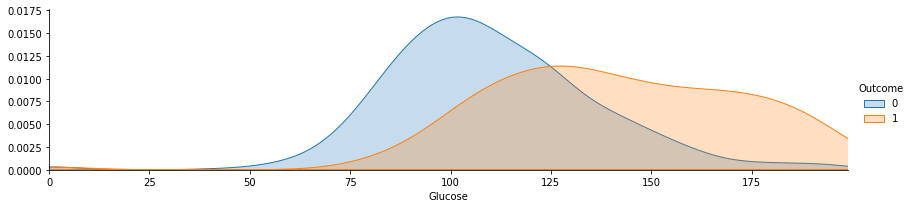

In [38]:
facet = sns.FacetGrid(df,hue='Outcome',aspect=4)
facet.map(sns.kdeplot,'Glucose',shade=True)m
facet.set(xlim=(0, df['Glucose'].max()))
facet.add_legend()

1. persons who had high glucose level(>125) had more chance of diabetes

1. can't be said if he/she would have diabetes based on DPF 

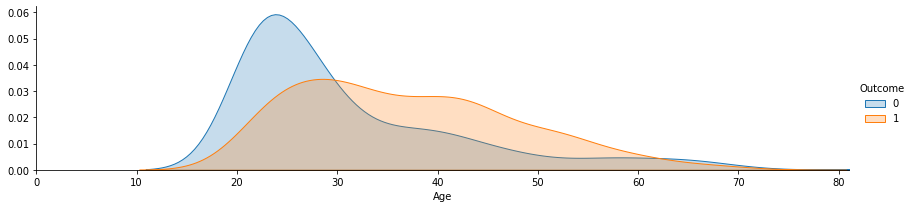

In [41]:
facet = sns.FacetGrid(df,hue='Outcome',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

1. As Age increses danger of diabetes more 

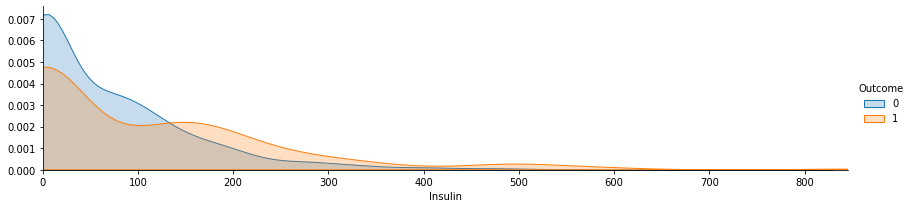

In [42]:
facet = sns.FacetGrid(df,hue='Outcome',aspect=4)
facet.map(sns.kdeplot,'Insulin',shade=True)
facet.set(xlim=(0, df['Insulin'].max()))
facet.add_legend()

1. not a clear picture

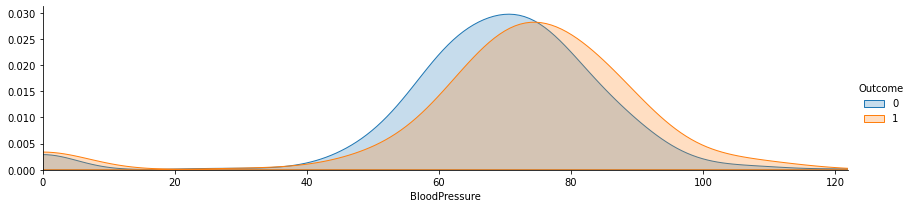

In [43]:
facet = sns.FacetGrid(df,hue='Outcome',aspect=4)
facet.map(sns.kdeplot,'BloodPressure',shade=True)
facet.set(xlim=(0, df['BloodPressure'].max()))
facet.add_legend()

no clear picture

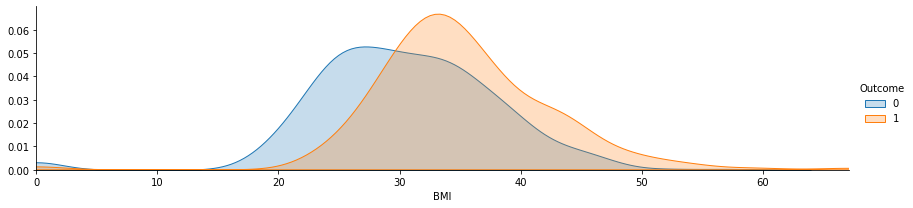

In [44]:
facet = sns.FacetGrid(df,hue='Outcome',aspect=4)
facet.map(sns.kdeplot,'BMI',shade=True)
facet.set(xlim=(0, df['BMI'].max()))
facet.add_legend()

1. BMI above 30 if a person , high chances of diabetes

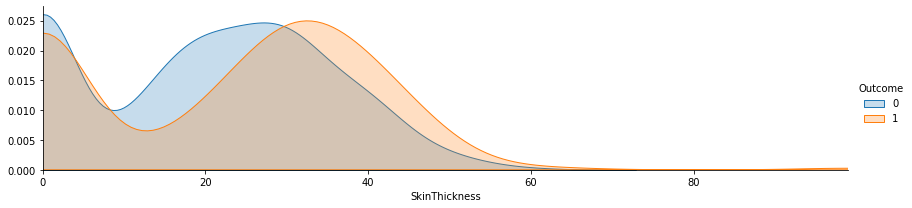

In [45]:
facet = sns.FacetGrid(df,hue='Outcome',aspect=4)
facet.map(sns.kdeplot,'SkinThickness',shade=True)
facet.set(xlim=(0, df['SkinThickness'].max()))
facet.add_legend()

No clear resemblance

Thus BMI, Age, Glucose dividing it in parts for classification would suit more 

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

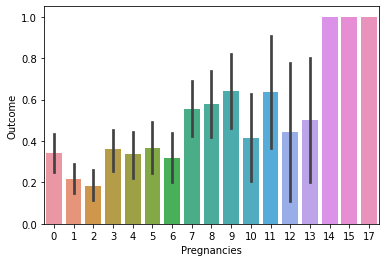

In [46]:
sns.barplot(df.Pregnancies,df.Outcome)

Persons with more number of pregnancies 14,15,17 and in middle 7-9 have more risk of pregnancies

In [47]:
pd.qcut(df['Glucose'],8,retbins=True)

(0        (140.25, 162.0]
 1         (-0.001, 88.0]
 2         (162.0, 199.0]
 3           (88.0, 99.0]
 4      (126.375, 140.25]
              ...        
 763        (99.0, 107.0]
 764     (117.0, 126.375]
 765     (117.0, 126.375]
 766     (117.0, 126.375]
 767         (88.0, 99.0]
 Name: Glucose, Length: 768, dtype: category
 Categories (8, interval[float64]): [(-0.001, 88.0] < (88.0, 99.0] < (99.0, 107.0] < (107.0, 117.0] < (117.0, 126.375] < (126.375, 140.25] < (140.25, 162.0] < (162.0, 199.0]],
 array([  0.   ,  88.   ,  99.   , 107.   , 117.   , 126.375, 140.25 ,
        162.   , 199.   ]))

In [87]:
df.loc[df['Glucose'] <= 88, 'Glucose' ] = 0
df.loc[(df['Glucose'] > 88) &(df['Glucose'] <= 99),'Glucose'] = 1
df.loc[(df['Glucose'] > 99) & (df['Glucose'] <= 107),'Glucose'] = 2
df.loc[(df['Glucose'] > 107) & (df['Glucose'] <= 117),'Glucose'] = 3
df.loc[(df['Glucose'] > 117) & (df['Glucose'] <= 127),'Glucose'] = 4
df.loc[(df['Glucose'] > 127) & (df['Glucose'] <= 140),'Glucose'] = 5
df.loc[(df['Glucose'] > 140) & (df['Glucose'] <= 162),'Glucose'] = 6
df.loc[(df['Glucose'] > 162) & (df['Glucose'] <= 199),'Glucose'] = 7

In [51]:
pd.qcut(df['BMI'],7,retbins=True)

(0        (33.229, 35.7]
 1          (24.7, 27.8]
 2        (-0.001, 24.7]
 3        (27.8, 30.771]
 4          (39.4, 67.1]
              ...       
 763    (30.771, 33.229]
 764        (35.7, 39.4]
 765        (24.7, 27.8]
 766      (27.8, 30.771]
 767      (27.8, 30.771]
 Name: BMI, Length: 768, dtype: category
 Categories (7, interval[float64]): [(-0.001, 24.7] < (24.7, 27.8] < (27.8, 30.771] < (30.771, 33.229] < (33.229, 35.7] < (35.7, 39.4] < (39.4, 67.1]],
 array([ 0.        , 24.7       , 27.8       , 30.77142857, 33.22857143,
        35.7       , 39.4       , 67.1       ]))

In [88]:
df.loc[df['BMI'] <= 24.7, 'BMI' ] = 0
df.loc[(df['BMI'] > 24.7) & (df['BMI'] <= 27.8),'BMI'] = 1
df.loc[(df['BMI'] > 27.8) & (df['BMI'] <= 30.771),'BMI'] = 2
df.loc[(df['BMI'] > 30.771) & (df['BMI'] <= 33.229),'BMI'] = 3
df.loc[(df['BMI'] > 33.229) & (df['BMI'] <= 35.7),'BMI'] = 4
df.loc[(df['BMI'] > 35.7) & (df['BMI'] <= 39.4),'BMI'] = 5
df.loc[(df['BMI'] > 39.4) & (df['BMI'] <= 67.1),'BMI'] = 6

In [95]:
df['BMI'] = df['BMI'].astype(int)

In [89]:
pd.qcut(df['Age'],8,retbins=True)

(0        (48.0, 81.0]
 1        (29.0, 34.0]
 2        (29.0, 34.0]
 3      (20.999, 22.0]
 4        (29.0, 34.0]
             ...      
 763      (48.0, 81.0]
 764      (26.0, 29.0]
 765      (29.0, 34.0]
 766      (41.0, 48.0]
 767      (22.0, 24.0]
 Name: Age, Length: 768, dtype: category
 Categories (8, interval[float64]): [(20.999, 22.0] < (22.0, 24.0] < (24.0, 26.0] < (26.0, 29.0] < (29.0, 34.0] < (34.0, 41.0] < (41.0, 48.0] < (48.0, 81.0]],
 array([21., 22., 24., 26., 29., 34., 41., 48., 81.]))

In [90]:
df.loc[df['Age'] <= 22, 'Age' ] = 0
df.loc[(df['Age'] > 22) & (df['Age'] <= 24),'Age'] = 1
df.loc[(df['Age'] > 24) & (df['Age'] <= 26),'Age'] = 2
df.loc[(df['Age'] > 26) & (df['Age'] <= 29),'Age'] = 3
df.loc[(df['Age'] > 29) & (df['Age'] <= 34),'Age'] = 4
df.loc[(df['Age'] > 34) & (df['Age'] <= 41),'Age'] = 5
df.loc[(df['Age'] > 41) & (df['Age'] <= 48),'Age'] = 6
df.loc[(df['Age'] > 48) & (df['Age'] <= 81),'Age'] = 7

In [91]:
df['Age'].value_counts()

0    135
5    108
3     96
7     94
4     92
1     84
2     81
6     78
Name: Age, dtype: int64

In [92]:
# clubbing the pregnancies in one group 
#based on heuristics obtained from the graph 
df.loc[df['Pregnancies'] <= 2, 'Pregnancies' ] = 0
df.loc[(df['Pregnancies'] > 2) & (df['Pregnancies'] <= 6),'Pregnancies'] = 1
df.loc[(df['Pregnancies'] > 6) & (df['Pregnancies'] <= 9),'Pregnancies'] = 2
df.loc[(df['Pregnancies'] > 9) & (df['Pregnancies'] <= 13),'Pregnancies'] = 3
df.loc[(df['Pregnancies'] > 13) & (df['Pregnancies'] <= 17),'Pregnancies'] = 4

In [93]:
df['Pregnancies'].value_counts()

0    349
1    250
2    111
3     54
4      4
Name: Pregnancies, dtype: int64

In [96]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,72,35,0,4,0.627,7,1
1,0,0,66,29,0,1,0.351,4,0
2,2,7,64,0,0,0,0.672,4,1
3,0,1,66,23,94,2,0.167,0,0
4,0,5,40,35,168,6,2.288,4,1
...,...,...,...,...,...,...,...,...,...
763,3,2,76,48,180,3,0.171,7,0
764,0,4,70,27,0,5,0.340,3,0
765,1,4,72,23,112,1,0.245,4,0
766,0,4,60,0,0,2,0.349,6,1


In [97]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.846354,3.468750,69.105469,20.536458,79.799479,2.988281,0.471876,3.343750,0.348958
std,0.951133,2.292568,19.355807,15.952218,115.244002,2.004849,0.331329,2.359825,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000
25%,0.000000,1.000000,62.000000,0.000000,0.000000,1.000000,0.243750,1.000000,0.000000
50%,1.000000,3.000000,72.000000,23.000000,30.500000,3.000000,0.372500,3.000000,0.000000
75%,1.000000,5.250000,80.000000,32.000000,127.250000,5.000000,0.626250,5.000000,1.000000
max,4.000000,7.000000,122.000000,99.000000,846.000000,6.000000,2.420000,7.000000,1.000000


In [98]:
for column in ['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']:
    df[column] = (df[column] - df[column].mean())/(df[column].std())

In [99]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,0.149543,0.906679,-0.692439,4,0.468187,7,1
1,0,0,-0.160441,0.530556,-0.692439,1,-0.364823,4,0
2,2,7,-0.263769,-1.287373,-0.692439,0,0.604004,4,1
3,0,1,-0.160441,0.154433,0.123221,2,-0.920163,0,0
4,0,5,-1.503707,0.906679,0.765337,6,5.481337,4,1
...,...,...,...,...,...,...,...,...,...
763,3,2,0.356200,1.721613,0.869464,3,-0.908090,7,0
764,0,4,0.046215,0.405181,-0.692439,5,-0.398023,3,0
765,1,4,0.149543,0.154433,0.279412,1,-0.684747,4,0
766,0,4,-0.470426,-1.287373,-0.692439,2,-0.370859,6,1


In [107]:
X = df.loc[:,'Pregnancies':'Age']
Y = df.loc[:,'Outcome']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [109]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [110]:
Y_pred3 = logreg.predict(X_test)

In [111]:
accuracy_score(Y_pred3,Y_test)

0.7662337662337663

In [165]:
SGD = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet",alpha = 0.31)
SGD.fit(X_train,Y_train)

SGDClassifier(alpha=0.31, penalty='elasticnet')

In [166]:
Y_pred4 = SGD.predict(X_test)

In [167]:
accuracy_score(Y_pred4,Y_test)

0.7727272727272727

In [188]:
(Y_pred4 == Y_test).sum()

119

In [191]:
Y_pred4.size

154